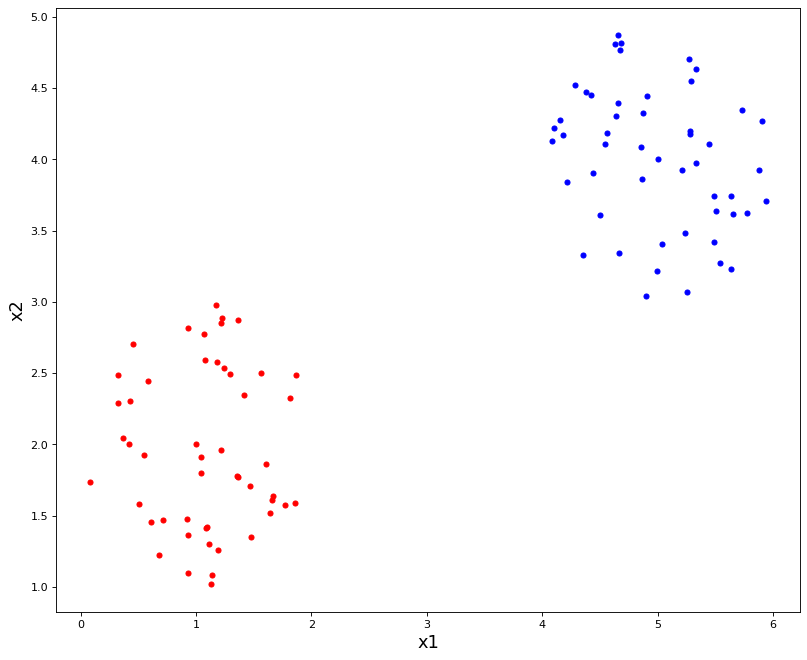

In [40]:
import numpy as np
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline


X=np.genfromtxt('X2.csv', delimiter=',')

y=np.genfromtxt('y.csv', delimiter=',')

y=y*-1.


idx_1=np.where(y==1)


idx_2=np.where(y==-1)

plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X[idx_1,0], X[idx_1,1], s=20, c='b', marker="o")

plt.scatter(X[idx_2,0], X[idx_2,1], s=20, c='r', marker="o")

plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)



plt.show()

In [41]:
import math

idx_1=np.array(idx_1)
dump, size1 = idx_1.shape
idx_2=np.array(idx_2)
dump, size2 = idx_2.shape

min1=-1.
min2=-1.
x_1=0
y_1=0

x_2=0
y_2=0

for z in range(size1):
    for s in range(size2):
        d = math.sqrt((X[idx_1[0,z],0] - X[idx_2[0,s],0])**2 +(X[idx_1[0,z],1] - X[idx_2[0,s],1])**2)
        if d < min1 or min1==-1:
            min1=float(d)
            x_1 = (X[idx_1[0,z],0] + X[idx_2[0,s],0])/2.
            y_1 = (X[idx_1[0,z],1] + X[idx_2[0,s],1])/2.

        if (d < min1 and d>min2) or (min2==-1):
            min2=float(d)
            x_2 = (X[idx_1[0,z],0] + X[idx_2[0,s],0])/2.
            y_2 = (X[idx_1[0,z],1] + X[idx_2[0,s],1])/2.


gradient = (y_2-y_1)/(x_2-x_1)

#y=mx+b

b = y_1 - (gradient * x_1)
print(b)
print(gradient)

w0=b

w=np.zeros(2)
w[0] = gradient
w[1] = -1





5.440775897647541
-0.8135919658825134


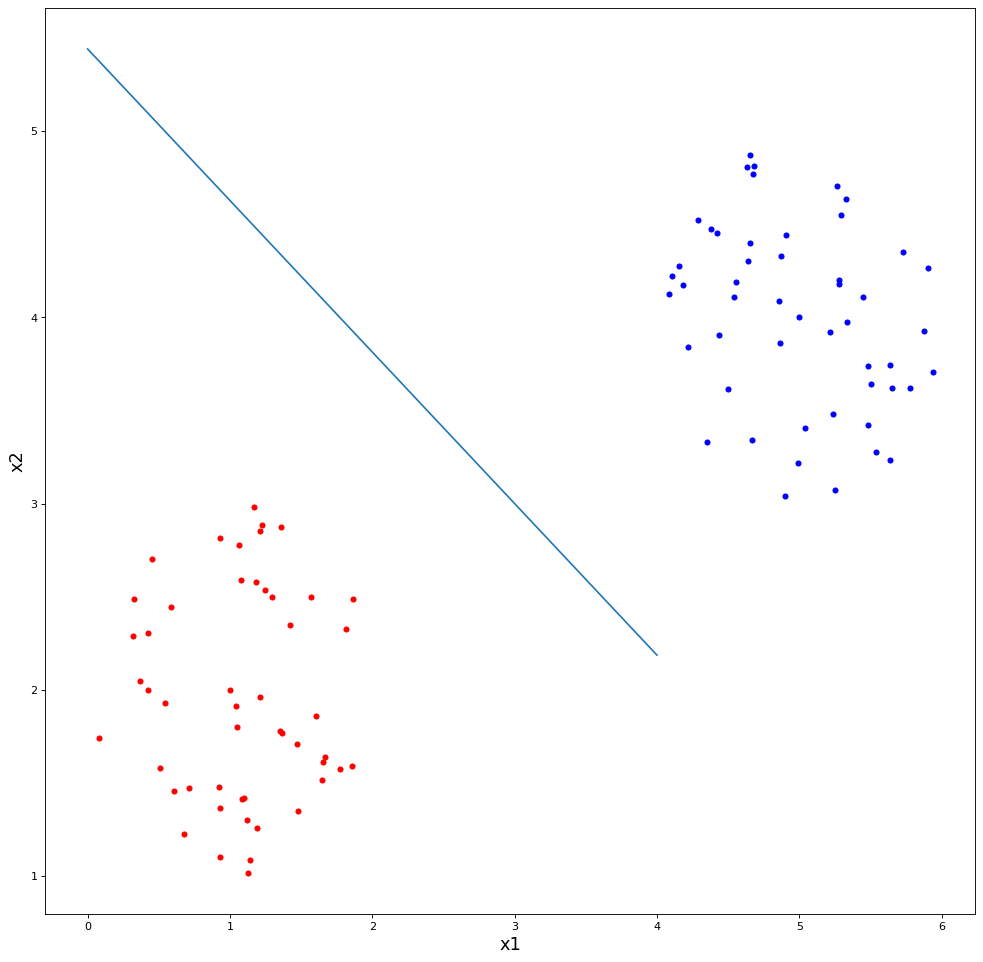

In [42]:
def plot_data_with_decision_boundary(X, y, w, w0, fig_size, labels=['x1', 'x2']):


    idx_1=np.where(y==1)

    idx_2=np.where(y==-1)

    plt.figure(num=None, figsize=fig_size, dpi=80, facecolor='w', edgecolor='k')

    plt.scatter(X[idx_1,0], X[idx_1,1], s=20, c='b', marker="o")

    plt.scatter(X[idx_2,0], X[idx_2,1], s=20, c='r', marker="o")

    plt.xlabel(labels[0], fontsize=16)
    plt.ylabel(labels[1], fontsize=16)

    f = np.arange(0.0,5.0)
    z = (-w[0]/w[1])*f - w0/w[1]

    plt.plot(f, z)


    plt.show()   

plot_data_with_decision_boundary(X, y, w, w0, fig_size=(15, 15), labels=['x1', 'x2'])

In [43]:
# a,b=X.shape

# sv_blue=-1
# sv_red=-1
# index_red=0
# index_blue=0

# idx_1=np.array(idx_1)
# dump, size = idx_1.shape

# for z in range(size): #blue
#     d = abs((w[0] * X[idx_1[0,z],0] + w[1] * X[idx_1[0,z],1] + w0)) / (math.sqrt(w[0] * w[0] + w[1] * w[1])) 
#     if d < sv_blue or sv_blue==-1:
#         sv_blue=float(d)
#         index_blue=idx_1[0,z]

# idx_2=np.array(idx_2)
# dump, size = idx_2.shape

# for z in range(size): #red
#     d = abs((w[0] * X[idx_2[0,z],0] + w[1] * X[idx_2[0,z],1] + w0)) / (math.sqrt(w[0] * w[0] + w[1] * w[1])) 
#     if d < sv_red or sv_red==-1:
#         sv_red=float(d)
#         index_red=idx_2[0,z]

# print('The margin for the red data is', sv_red, 'at data point', index_red)
# print('The margin for the blue data is', sv_blue, 'at data point', index_blue)

In [44]:

def get_margin(w0, w, X, idx_1, idx_2):


    a,b=X.shape

    sv_blue=-1
    sv_red=-1
    index_red=0
    index_blue=0

    idx_1=np.array(idx_1)
    dump, size = idx_1.shape

    for z in range(size): #blue
        d = abs((w[0] * X[idx_1[0,z],0] + w[1] * X[idx_1[0,z],1] + w0)) / (math.sqrt(w[0] * w[0] + w[1] * w[1])) 
        if d < sv_blue or sv_blue==-1:
            sv_blue=float(d)
            index_blue=idx_1[0,z]

    idx_2=np.array(idx_2)
    dump, size = idx_2.shape

    for z in range(size): #red
        d = abs((w[0] * X[idx_2[0,z],0] + w[1] * X[idx_2[0,z],1] + w0)) / (math.sqrt(w[0] * w[0] + w[1] * w[1])) 
        if d < sv_red or sv_red==-1:
            sv_red=float(d)
            index_red=idx_2[0,z]

    if sv_red < sv_blue:
        return sv_red
    else:
        return sv_blue

In [45]:
def svm_sgd(X, Y, idx_1, idx_2, w0, w):

    #w = np.array[-1, -0.5]

    eta = 0.0001
    regulaizer=0.1
    epochs = 100000
    print(w)
    print(w0)

    for epoch in range (1, epochs):
        current_cost = get_margin(w0, w, X, idx_1, idx_2)
        grad_w0 = (get_margin(w0+eta, w, X, idx_1, idx_2) - current_cost)/eta
        w_temp_1=np.zeros(2)
        w_temp_1[0]=w[0]+eta
        w_temp_1[1]=w[1]
        
        w_temp_2=np.zeros(2)
        w_temp_2[0]=w[0]
        w_temp_2[1]=w[1]+eta
        #print(w_temp_2)

        grad_w1 = (get_margin(w0, w_temp_1, X, idx_1, idx_2) - current_cost)/eta
        grad_w2 = (get_margin(w0, w_temp_2, X, idx_1, idx_2) - current_cost)/eta
        # print((get_margin(w0, w_temp_2, X, idx_1, idx_2)))
        # print(current_cost)
        

        # grad_w1 = (get_margin(w0, w_temp_1, X, idx_1, idx_2) - current_cost)/eta
        # w_temp_1[1]=w_temp_1[1]+eta
        
        # grad_w2 = (get_margin(w0, w_temp_1, X, idx_1, idx_2) - current_cost)/eta

        #if grad_w0 > 0:
        w0 = w0 + regulaizer*grad_w0
            
        #if grad_w1 > 0:
        w[0]= w[0] + regulaizer*grad_w1

        #if grad_w2 > 0:
        w[1]= w[1] + regulaizer*grad_w2

    return w0, w




w0, w = svm_sgd(X, y, idx_1, idx_2, w0, w)
print(w)
print(w0)

[-0.81359197 -1.        ]
5.440775897647541
[-8.53816273 -2.91517369]
34.86825344543233


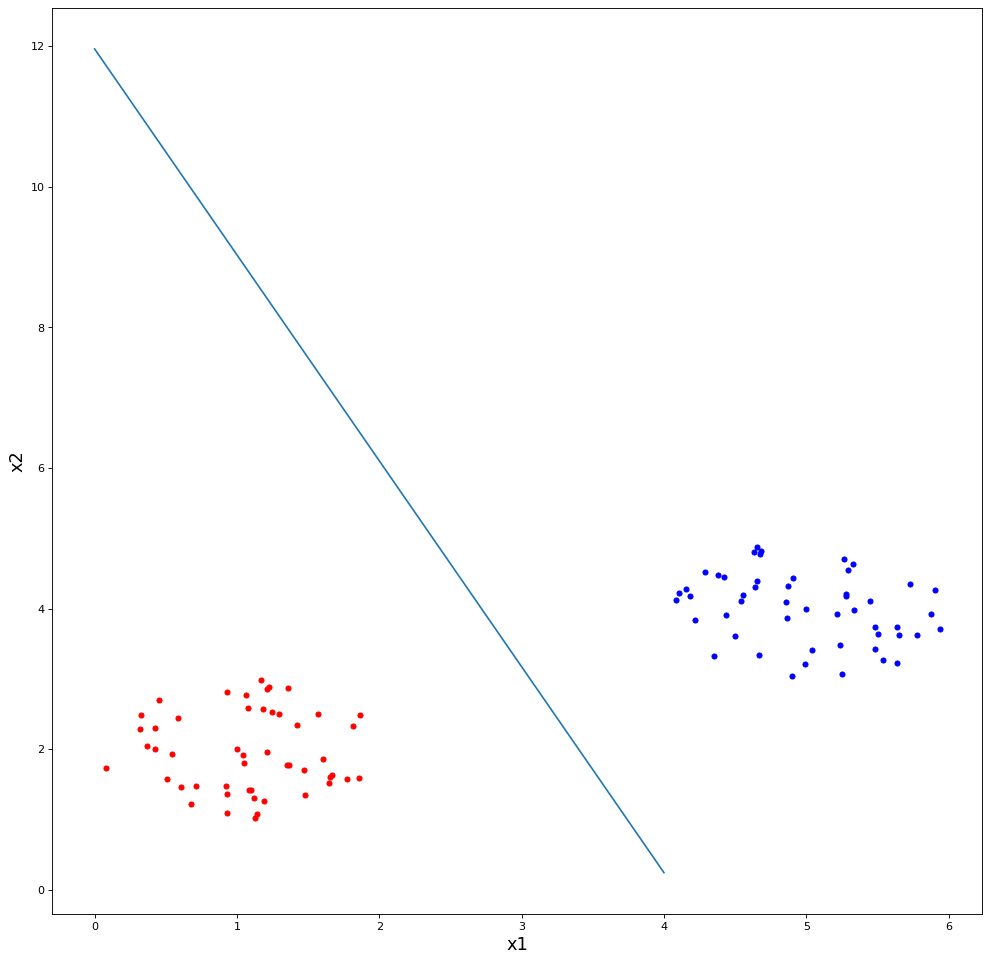

In [46]:
plot_data_with_decision_boundary(X, y, w, w0, fig_size=(15, 15), labels=['x1', 'x2'])

In [47]:
a,b=X.shape

sv_blue=-1
sv_red=-1
index_red=0
index_blue=0

idx_1=np.array(idx_1)
dump, size = idx_1.shape

for z in range(size): #blue
    d = abs((w[0] * X[idx_1[0,z],0] + w[1] * X[idx_1[0,z],1] + w0)) / (math.sqrt(w[0] * w[0] + w[1] * w[1])) 
    if d < sv_blue or sv_blue==-1:
        sv_blue=float(d)
        index_blue=idx_1[0,z]

idx_2=np.array(idx_2)
dump, size = idx_2.shape

for z in range(size): #red
    d = abs((w[0] * X[idx_2[0,z],0] + w[1] * X[idx_2[0,z],1] + w0)) / (math.sqrt(w[0] * w[0] + w[1] * w[1])) 
    if d < sv_red or sv_red==-1:
        sv_red=float(d)
        index_red=idx_2[0,z]

print('The margin for the red data is', sv_red, 'at data point', index_red)
print('The margin for the blue data is', sv_blue, 'at data point', index_blue)


The margin for the red data is 1.295228489690515 at data point 33
The margin for the blue data is 1.3316078583564286 at data point 63
